# Why Difference Time Series Data?

Differencing is a method of transforming a time series dataset.

It can be used to remove the series dependence on time, so-called temporal dependence. This includes structures like trends and seasonality.

    Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.
 link 
 
https://machinelearningmastery.com/difference-time-series-dataset-python/

Differencing is performed by subtracting the previous observation from the current observation
**difference(t) = observation(t) - observation(t-1**
In this way, a series of differences can be calculated.
# Lag Difference

Taking the difference between consecutive observations is called a lag-1 difference.

The lag difference can be adjusted to suit the specific temporal structure.

For time series with a seasonal component, the lag may be expected to be the period (width) of the seasonality.
# Difference Order

Temporal structure may still exist after performing a differencing operation, such as in the case of a nonlinear trend.

As such, the process of differencing can be repeated more than once until all temporal dependence has been removed.

The number of times that differencing is performed is called the difference order.

In [2]:
# load and plot dataset
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
# load dataset

dataset = read_csv('C:/Users/rzouga/Downloads/Github/TimeSeriesData/Shampo.csv')
# summarize first few rows
print(dataset.head())

     MonthSales
0  "1-01",266.0
1  "1-02",145.9
2  "1-03",183.1
3  "1-04",119.3
4  "1-05",180.3


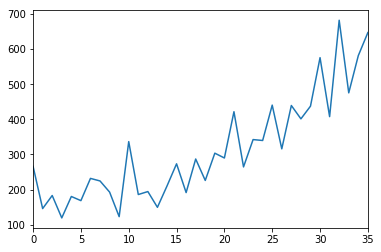

In [7]:
dataset['sales'] = dataset.MonthSales.apply(lambda x: float(x[7:12]))
series=dataset.loc[:,'sales']
series.plot()
pyplot.show()

# Manual Differencing

We can difference the dataset manually.

This involves developing a new function that creates a differenced dataset. The function would loop through a provided series and calculate the differenced values at the specified interval or lag.

The function below named difference() implements this procedure

In [8]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

We can see that the function is careful to begin the differenced dataset after the specified interval to ensure differenced values can, in fact, be calculated. A default interval or lag value of 1 is defined. This is a sensible default.

One further improvement would be to also be able to specify the order or number of times to perform the differencing operation.

The example below applies the manual difference() function to the Shampoo Sales dataset.

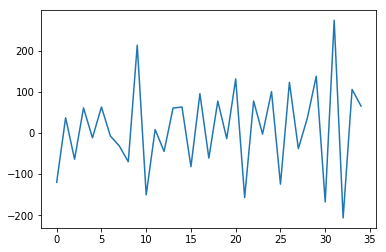

In [11]:
from pandas import datetime
from pandas import Series
X = series.values
diff = difference(X)
pyplot.plot(diff)
pyplot.show()

# Automatic Differencing

The Pandas library provides a function to automatically calculate the difference of a dataset.

This diff() function is provided on both the Series and DataFrame objects.

Like the manually defined difference function in the previous section, it takes an argument to specify the interval or lag, in this case called the periods.

The example below demonstrates how to use the built-in difference function on the Pandas Series object.

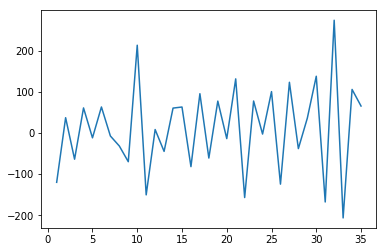

In [12]:
diff = series.diff()
pyplot.plot(diff)
pyplot.show()